# Regression Basics
Lecture notes by
_Sunil Paul_

- The materials in this notebook is prepared using “Diebold, F.X. (2019), Econometric Data Science: A Predictive Modeling Approach, Department of Economics, University of Pennsylvania,
http://www.ssc.upenn.edu/~fdiebold/Textbooks.html.”- 

- We use Current Population Survey (CPS) datasets. For details refer the Appendix of the text

<span style='color:red'>Need to update the reading materials</span>

## Introduction
We already saw how _random assignment_ resolce the problem of selection bias Provided you get the design of your experiment right, all you need to do is to compare mean values across the two groups ($D_i = 0; D_i = 1$). If done right, a pure randomized experiment is in many ways the most convincing method of evaluation. But
- It is often expensive to do experiements in social sciencies 
- It is very difficult to generalise the results as it is i) hard to replicate ii) sample specific and programe specific
- there can be many practical concerns in the design and implimentation.

For these reasons, most empirical research is still based on non-experimental (observational) data.
When we have non-experimental data, we must assume that individuals at least partly determine whether
they receive treatment. WE can still use randomised trails as our benchmark.

## Regression  Analysis of Experiments

Regression analysis is the key tool for analyzing experimental as well as non-experimental data in applied economics. Suppose for a moment that the treatment effect is the same for everybody,
$$Y_{1i}-Y_{0i}=\kappa$$

In this case, we can re-write our expression for observed outcomes in regression form:

$$Y_i=Y_{0i}+(Y_{1i}-Y_{0i})D_i$$ as
$$=\alpha+\kappa D_i+\epsilon_i$$
where $\alpha=E[Y_{0i}], \kappa=(Y_{1i}-Y_{0i}$ and$\epsilon_i=Y_{0i}-E[Y_{0i}]$.The residual ($\epsilon_i$) is interpretable as the random part of $Y_{0i}$. Now take expectations, conditional on
treatment and no treatment:
\begin{align}
E[Y_{i}|D_i=1]&=\alpha+\kappa+E[\epsilon_i|D_i=1]\\
E[Y_{i}|D_i=0]&=\alpha+E[\epsilon_i|D_i=1]
\end{align}
so that 

$E[(Y_{1i}-Y_{0i})|D_i=1]=\kappa$-(<span style='color:red'>Average treatment effect</span>)

$E[\epsilon_i|D_i=1]-E[\epsilon_i|D_i=0]$(<span style='color:red'>selection bias</span>)

In this framework the selection bias amounts to non-zero correlation between the regression
error term($\epsilon_i$) and the regressor$(D_i)$ (We will discuss this in detail later). since
$$E[\epsilon_i|D_i=1]-E[\epsilon_i|D_i=0]=E[Y_{i0}|D_i=1]-E[Y_{i0}|D_i=0]$$
this correlation reflects the difference in potential outcomes (under no treatment) between those who get treated and those who don’t. It is also clear that, if $D_i$ is randomly assigned, there is no selection bias so that a regression of observed outcomes $Y_i$ on actual treatment status $D_i$ estimates the causal effect of interest ($\kappa$).

Now let us disucss the __Basics of regression__

## Regression Basics
Assume we are interested in the questions given below
- Does your education has anything to do with your salary?
- How experience increases your salary?

Let us have a look into the data. 

### Preparing the data

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




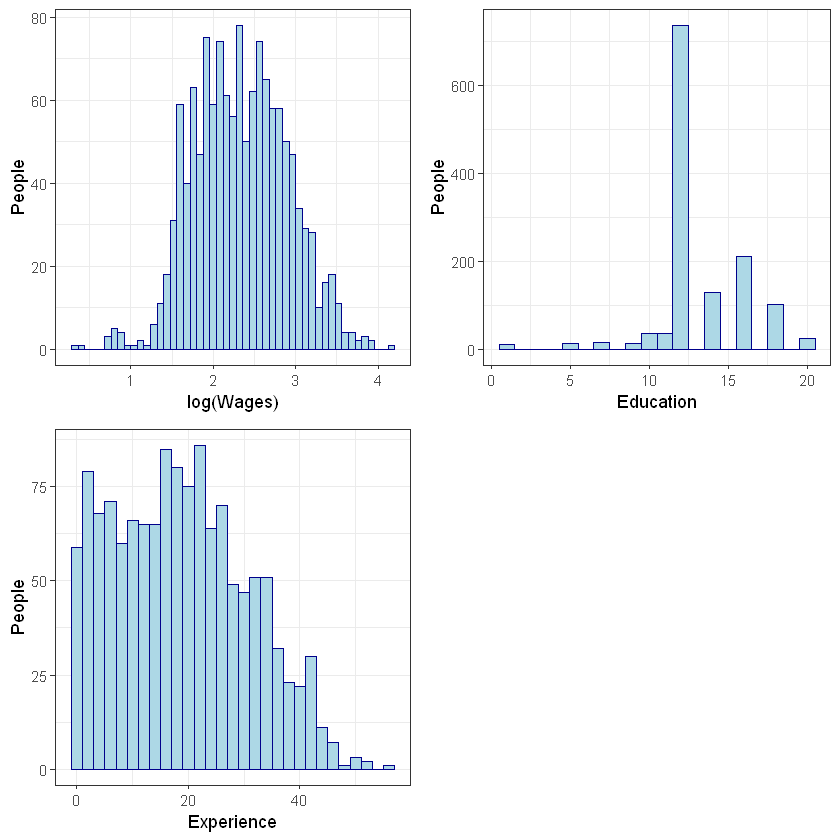

In [1]:

options(warn=-1) # to hide the warning
# Install required packages
library(ggplot2)
library(lmtest)
library(sandwich)
library(gridExtra)

#Data
### we take the data on wages , experience and eduction for our excample
wage95 <- read.csv("DataWages.csv", header=TRUE)
wages <- wage95$WAGE
lnwages <- wage95$LNWAGE
edu <- wage95$EDUC
exper <- wage95$EXPER

# Plots(histographs) using ggplot
h1 <- ggplot()+ geom_histogram(aes(lnwages),binwidth=0.08,color="darkblue", fill="lightblue")+
geom_density(color = "red")+
theme_bw()+xlab("log(Wages)")+ylab("People") 
h2<- ggplot()+ geom_histogram(aes(edu),binwidth=1,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Education")+ylab("People")
h3<- ggplot()+ geom_histogram(aes(exper),binwidth=2,color="darkblue", fill="lightblue")+
theme_bw()+xlab("Experience")+ylab("People")

grid.arrange(h1, h2,h3, ncol=2)

## Regression as Curve fitting
 Consider a simple regression with on dependent variable $y_i$ and one independent variable $x_i$.
 
Then the regression tries to fit a line i.e $y_i=\beta_1+\beta_2X_i$ that minimises the devivation from data to the line estimated. 

In general, a 'quantratic loss' fuction9Mean square error) is used to find the "best fit)
$$\min_{\beta_1,\beta_2} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i)^2= Q$$

Following graph displays the scatter plat and regression line fitted with log( wages) as a function of education.

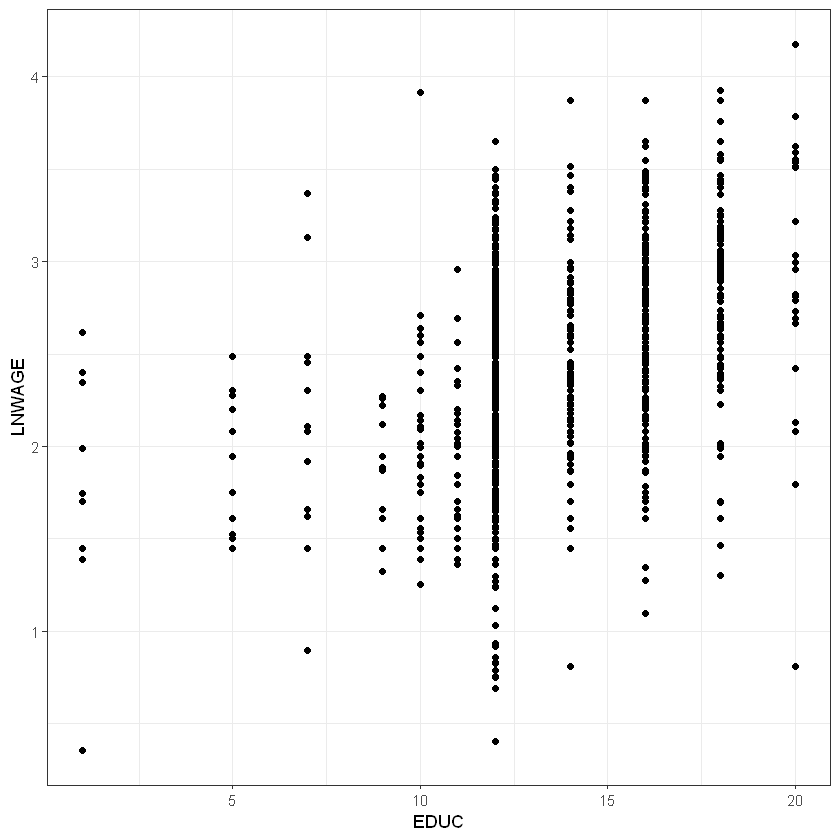

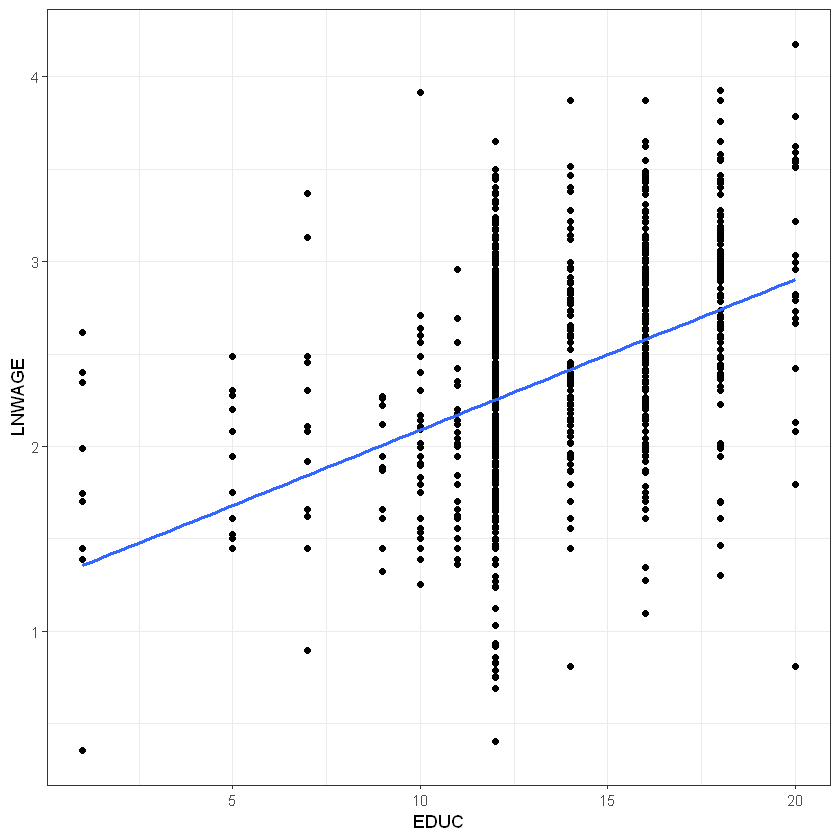

In [2]:
p <- ggplot(data=wage95, aes(y=LNWAGE,x=EDUC))+geom_point()+theme_bw()
p

p+geom_smooth(method=lm, formula = y ~ x, se = FALSE)


### Derivation of $\hat{\beta}_1$ and $\hat{\beta}_2$ 

It is very easy to derive the expression to calculate the $\beta$s by minimising the quntratic loss function. The details are given below: 

Differenciate $Q(\beta_1,\beta_2)$ w.r.t $\beta_1$ and $\beta_2$

$$\frac{\partial Q}{\partial{\beta_1}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-1)=0$$
$$\frac{\partial Q}{\partial{\beta_2}}=2\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$
solve the above equation for $\beta_1$ and $\beta_2$

Consider the first Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)=0$$

$$\sum_{i=1}^{N}y_i-N{\beta}_1-{\beta}_2\sum_{i=1}^{N} x_i=0$$
Dividing the above equation by N we have 
$$\bar{y}-{\beta}_1-{\beta}_2\bar{x}$$
$$\therefore \hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$$ 
(we use $\hat{}$ to indicate the estimator of parameter of interest)

Consider the second Normal equation$$
\sum_{i=1}^{N}(y_i-{\beta}_1-{\beta}_2 x_i)(-x_i)=0$$

$$\sum_{i=1}^{N}y_ix_i-{\beta}_1\sum_{i=1}^{N}x_i-{\beta}_2\sum_{i=1}^{N} x_i^2=0$$
Dividing the above equation by N we have 
$$\frac{1}{N}\sum_{i=1}^{N}y_ix_i-{\beta}_1\bar{x}-{\beta}_2\frac{1}{N}\sum_{i=1}^{N} x_i^2=0$$
substituting $\hat{\beta_1}=\bar{y}-\hat{\beta}_2 \bar{x}$ and solving for $\hat{\beta}_2$ we get
$$\hat{\beta}_2=\frac{\frac{1}{N} \sum_{i=1}^{N} y_ix_i-\bar{y}\bar{x}}{\frac{1}{N} \sum_{i=1}^{N}x_i^2-\bar{x}^2}$$


Alternative expressions 

$$\hat{\beta}_2=\frac{\sum (y_i-\bar{y})(x_i-\bar{x})}{\sum (x_i-\bar{x})^2}$$
Alternative expression 
$$\hat{\beta}_2=\frac{Cov(y,x)}{Var(x^2)}$$

#### Actual Values, Fitted Values and Residuals
In the context of simple regression we have 
- Actual values: $y_i; i = 1,2,..., N$

- Least-squares fitted parameters:$\beta_1$ and $\beta_2$

- Fitted values: $\hat{y}_i = \hat{\beta}_1 + \hat{\beta}_2 x_i; i = 1,2,..., N$

- Residuals: $e_i = y_i − \hat{y}_i; i = 1,2,..., N$

The line that fits the scatter plot can be estimated using least square is given as follows:
$$\hat{lwages}=1.273+0.081 EDUC$$

### Multiple Linear Regression (K RHS Variables)
Simple regression can be extented by incorporating more explanatory variables($x$s).

The unkown $\beta$s of Multiple regression can be estimated by solving :
 $$\min_{\beta_1,...,\beta_k} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i-...-\beta_k x_k)^2$$

fitted hyperplane: $$\hat{y}_i = \sum_{k=1}^{K}\hat{\beta}_k x_{ik};$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$



#### Multiple regression in Matrix form
 We can represent the multiple regresss more compactly in matrix form as follows
 $$y=X\beta+\varepsilon$$ where
$$ y=\begin{pmatrix}y_1\\y_2\\\vdots\\y_N\end{pmatrix}$$
$$X =\begin{pmatrix}1&x_{12}&x_{13}&\ldots&x_{1k}\\1&x_{22}&x_{23}&
\ldots&x_{2k}\\ \vdots&&&&\\1&x_{N2}&x_{N3}&\ldots&x_{Nk}\end{pmatrix}$$  

$$\beta= \begin{pmatrix}{\beta_1}\\ {\beta_2}\\ {\vdots}\\{\beta_k}\end{pmatrix}$$ and 
$$\varepsilon=\begin{pmatrix}{\varepsilon_1}\\ {\varepsilon_2}\\ {\vdots}\\{\varepsilon_N}\end{pmatrix}$$
or
 $${y}_i = \sum_{k=1}^{K}{\beta}_k x_{ik}+\varepsilon_i;$$ $ i = 1,2,..., N, x_{1k}=1$ for all $i$



In matrix notation the curve fitting problem can be represented as
$$\min_{\beta}((y-X\beta)'(y-X\beta))$$ 

Let $$Q=(y-X{\beta})^{\prime }{(y-X{\beta})}$$
 and expanding Q we get

$$Q={y}^{\prime }y-{y}^{\prime }X{\beta}-{
\beta}^{\prime }{X}^{\prime }{y+{\beta}}^{\prime }{
X}^{\prime }{X{\beta}}$$

The first order condition for this minimizartion problem is given as follows

$$\frac{\partial Q}{\partial {\beta}}{=0\Longrightarrow -X}%
^{\prime }{y-X}^{\prime }{y+2X}^{\prime }{X{\beta}=0%
}$$



giving the normal equations*

$${(X}^{\prime }{X){\beta}=X}^{\prime }{y}$$

Solving the normation equations for $\beta$ we get:

$${\hat{\beta}_{LS}=(X}^{\prime }{X)}^{-1}{X}^{\prime }{y}$$

(_*Note_: The first term in $yy^{\prime }-2{\beta}^{\prime}X^{\prime }y+{\beta}^{\prime }X^{\prime }X{\beta}$ contains no ${\beta}$, the second term is linear in ${\beta}$ since $X^{\prime }y$ is a column vector of known numbers and we use the fact $\frac{\partial (a^{\prime }b)}{\partial b}=\frac{\partial (b^{\prime }a)}{\partial b}=a$. The third term is asymmetric quantratic form in b and $\frac{\partial (b^{\prime }Ab)}{\partial b}=2Ab.$)

**Example 1**
Given the following sample data for a model 


$$y=
\begin{bmatrix}
3 \\ 
1 \\ 
8 \\ 
3 \\ 
5
\end{bmatrix}
$$

and 
$$X=
\begin{bmatrix}
1 & 3 & 5 \\ 
1 & 1 & 4 \\ 
1 & 5 & 6 \\ 
1 & 2 & 4 \\ 
1 & 4 & 6
\end{bmatrix} $$

Then $$X^{\prime }X=
\begin{bmatrix}
5 & 15 & 25 \\ 
15 & 55 & 81 \\ 
25 & 81 & 129%
\end{bmatrix}%
$$ and $$X^{\prime }y=%
\begin{bmatrix}
20 \\ 
76 \\ 
109%
\end{bmatrix}
$$

The normal equation (${(X}^{\prime }{X){\beta}=X}^{\prime }{y}$) in this case would be\\

$$%
\begin{bmatrix}
5 & 15 & 25 \\ 
15 & 55 & 81 \\ 
25 & 81 & 129%
\end{bmatrix}%
$$%
$$
\begin{bmatrix}
\hat{\beta}_{1} \\ 
\hat{\beta}_{2} \\ 
\hat{\beta}_{3}%
\end{bmatrix}%
=%
\begin{bmatrix}
20 \\ 
76 \\ 
109%
\end{bmatrix}%
$$

Using  $\hat{\beta}=(X^{\prime }X)^{-1}X^{\prime }y$. 

In [11]:
xx<- matrix(c(5,15,25,15,55,81,25,81,129),nrow=3)
xy <-matrix(c(20,76,109),nrow=3)

solve(xx)%*%xy

4.0
2.5
-1.5



Thus, $\hat{\beta}$ is 

$
\begin{bmatrix}
4 \\ 
2.5 \\ 
-1.5
\end{bmatrix}
$

## Regression as a probability Model

### A Population Model and a Sample Estimator
Regression captures relation ship between dependent($y$) and a set of  independent variables($x$s). In addition if we include a randomly distributed error term to account for other unobervered factor then we can intrepret the regression model as a probability model. However we may no be able to get observation for all the elements in a population and we need to infer about this model using the data of relevent variables from random samples taken from the population.

In brief we can spcify the data generating process of in terms of regression model and an error term as follows:


### Ideal conditions (IC)
The assumptions about  the model given below helps us to estimate and infer about the parameters. The LS estimators will have some desriable properties (for e.g. estimators will be unbiased, efficient and consistent) 

1. The data-generating process (DGP) is:
$$y=X\beta+\varepsilon$$
$$\varepsilon \sim N(0,\sigma^2 I)$$ and the fitted model matches it exactly.

    1. The fitted model is correctly specified
    2.  The disturbances are Gaussian
    3.  The coefficients$(\beta)$ are fixed
    3. The relationship is linear
    4. $Var(\varepsilon)=\sigma^2I$; variance of error are constant
    5. $E(\varepsilon_i\varepsilon_j)=0;i\ne j$ errors are uncorrelated
2. $E(\varepsilon X)=0 $  errors are  independent of $X$
    1. $E(\varepsilon|X)=0$
    2. $Var(\varepsilon|X)=\sigma^2$
    
   Sample counterpart of population regression 
    $$y=X \hat{\beta}+e$$
    where $\hat{\beta}$ is the sample estimator of population parameter $\beta, e$ is the estimated value of $\varepsilon$ and we define $s^2$ asthe samaple estimator of error variance $\sigma^2$ 
    
Applying least square principle we can estimate the $\beta$s from the equation (28) above i.e   appropriate elements of $(X'X)^{-1}X'y$ and the standraed error of the coefficicents is the digaonal elements of $\sqrt{s^2(X'X)^{-1}}$ and $s^2$ is the estimate of error variance(defined in section 4 below)
    
- The standard errors of the estimated coefficients indicate their reliability (sampling variance)

## Large-Sample Distribution of $\beta_{LS}$

We have defined population regression (we consider a simple regression for the ease of discussion but can be generalised ) as $Y=\beta_1 +\beta_2 X+\varepsilon,$where $\beta_1,\beta_2 $ and $\sigma ^{2}$ are population parameters of interest. We can estimate these parameters from observable values of $X$ and $Y$ using least square principle($\min_{\beta_1,\beta_2} \sum_{i=1}^{N}(y_i-\beta_1-\beta_2x_i)^2$ where $y_i-\beta_1-\beta_2x_i=\varepsilon_i$).

Suppose we estimated the unknown parameters using LS estimators from a given sample. Then can we consider the computed values as a good estimate of  unknown parameter?. Answer to this question depends on the properties of estimator (the formula we used to estimate it). To understand the statistical properties of LS estimators we need to consider its sampling distribution. A sampling distribution describes the behavior of the estimators in repeated application of the estimating formulae. Suppose we estimate $\widehat{\beta_2 }$ repeatedly from say 2000 times from 2000 different samples. Then we gets different estimate for $\beta_2$ each time since the sample differ each time. The sampling distribution describe how these estimators are distributed. The properties of sampling distribution of an estimators depends on the data generating  process so an estimator may be good in one context and bad in another. 

Let us discuss it in different perspective. Considering the population regression function it is clear that given the values of $x$ the the source of variation in $y$ from one sample to another is the variation in the error term. Hence the random component in y is due to the error. Now consider the LS estimator $\widehat{\beta_2 }=\frac{Cov(Y,X)}{Var(x)}$. Note that$Cov(x,y)$ depends on the values of $y$ and $y$ on error terms $\varepsilon$. Thus if the
values of the disturbance term had been different in the n observations, we would have obtained different values of Y,and hence a different $Cov(X,Y)$ and consequently a different $\widehat{\beta_2}$. In summary the sample values of $\widehat{\beta_2 }$ depends on how assumptions regarding the error term. That is reason why assumptions under IC are very important intraditional econometric analysis Under IC we have assumed that $\varepsilon \sim
iidN(0,\sigma ^{2})$and $E(X,\varepsilon)=0.$ Using these assumptions we can derive the sampling distributions of LS estimators. In the case of simple regression $\widehat{\beta_2 } \sim N(\beta_2,V(\beta))$.

### Under the IC
In general $\beta_{LS}$ is consistent and asymptotically normally distributed with covariance matrix V,

$$\hat{\beta}_{LS}\stackrel{a}{\sim} N(\beta,V)$$

we estimate $V$ using $$\hat{V}= s^2(X'X)^{-1},$$ where $$s^2=e'e=\frac{\sum_{i=1}^{N}e_i^2}{N-K}.$$
We will use these results for hypothesis testing

## Why do we care about regression?
In economics, we are often interested to learn about differnce in economic outomes. These difference may be characterised by randomness that makes it  hard to explain. Our objective is to summerise and interpret this randomness in a meaningful way.

__Example: Connection between education and earnings__
- On average, people with more schooling earn more than people with less schooling
_Points to consider_
- May not imply a causal relation eventhough it is important
- The connection between schooling and earnings has considerable predictive power
- This predictive power can be convinvingly summerised by Conditional Expection Function

We will address the causality question little later. Let us explore the  important relationships between i) <span style='color:red'> the conditional expectation function </span>,ii) <span style='color:blue'>population regression function</span> and iii <span style='color:purple'>sampling distribution of regression estimates</span>

<span style='color:red'><b>Conditional expectation function </b> </span> for a dependent variable $\text{Y}_{i}$, given a $\text{K}\times 1$ vector of covariates $\text{X}_{i}$, tells us <span style='color:purple'>the expected value (population average) of</span> $\color{#e64173}{\text{Y}_{i}}$ with $\color{#e64173}{\text{X}_{i}}$ held constant. Written as $\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]$, the CEF is a function of $\text{X}_{i}$.<sup>

-  We'll generally assume $\text{X}_{i}$ is a random variable, which implies that $\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]$ is also a random variable.
- We are focusing on the __population__. We want to build our intuition about the parameters that we will eventually estimate.

__Other Examples__

- $\mathop{E}\left[ \text{Income}_i \mid \text{Education}_i \right]$


- $\mathop{E}\left[ \text{Wage}_i \mid \text{Gender}_i \right]$


- $\mathop{E}\left[ \text{Birth weight}_i \mid \text{Air quality}_i \right]$
---

Formally, for continuous $\text{Y}_{i}$ with conditional density $f_y(t|\text{X}_{i}=x)$,
$$
  \mathop{E}\left[ {Y}_{i}\mid {X}_{i} = x \right] = \int t f_y(t|{X}_{i}=x)dt
$$
and for discrete $\text{Y}_{i}$ with conditional p.m.f. $\mathop{{Pr}}\left({Y}_{i}=t|{X}_{i}=x\right)$,
    
$$
\mathop{E}\left[ {Y}_{i}\mid {X}_{i}=x \right] = \sum_t t \mathop{{Pr}}\left({Y}_{i}=t|{X}_{i}=x\right)

$$






Picking joint bandwidth of 2410

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.g

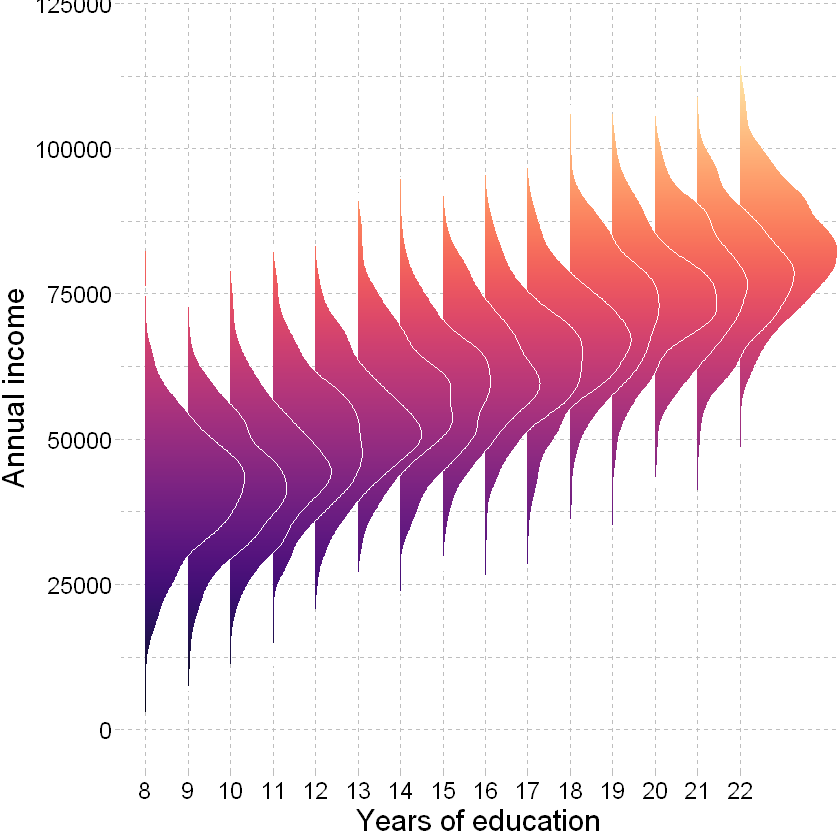

In [19]:
library(ggplot2)
library(dplyr)
library(ggridges)
library(viridis)
library(ggthemes)

# Set seed
set.seed(12345)
# Sample size
n <- 1e4
# Generate extra disturbances
u <- sample(-2:2, size = 22, replace = T) * 1e3
# Generate data
cef_df <- tibble(
  x = sample(x = seq(8, 22, 1), size = n, replace = T),
  y = 15000 + 3000 * x  + 1e3 * (x %% 3) + 500 * (x %% 2) + rnorm(n, sd = 1e4) + u[x]
) %>% mutate(x = round(x)) %>%
filter(y > 0)
# Means
means_df <- cef_df %>% group_by(x) %>% summarize(y = mean(y))
# The CEF in ggplot
gg_cef <- ggplot(data = cef_df, aes(x = y, y = x %>% as.factor())) +
  geom_density_ridges_gradient(
    aes(fill = ..x..),
    rel_min_height = 0.003,
    color = "white",
    scale = 2.5,
    size = 0.3
  ) +
  scale_x_continuous(
    "Annual income"
  ) +
  ylab("Years of education") +
  scale_fill_viridis(option = "magma") +
  theme_pander(base_family = "Fira Sans Boo", base_size = 18) +
  theme( legend.position = "none"
  ) +
  coord_flip()
gg_cef

__The conditional distributions of $\text{Y}_{i}$ for $\text{X}_{i}=x$ in 8, ..., 22.__

Picking joint bandwidth of 2410

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.g

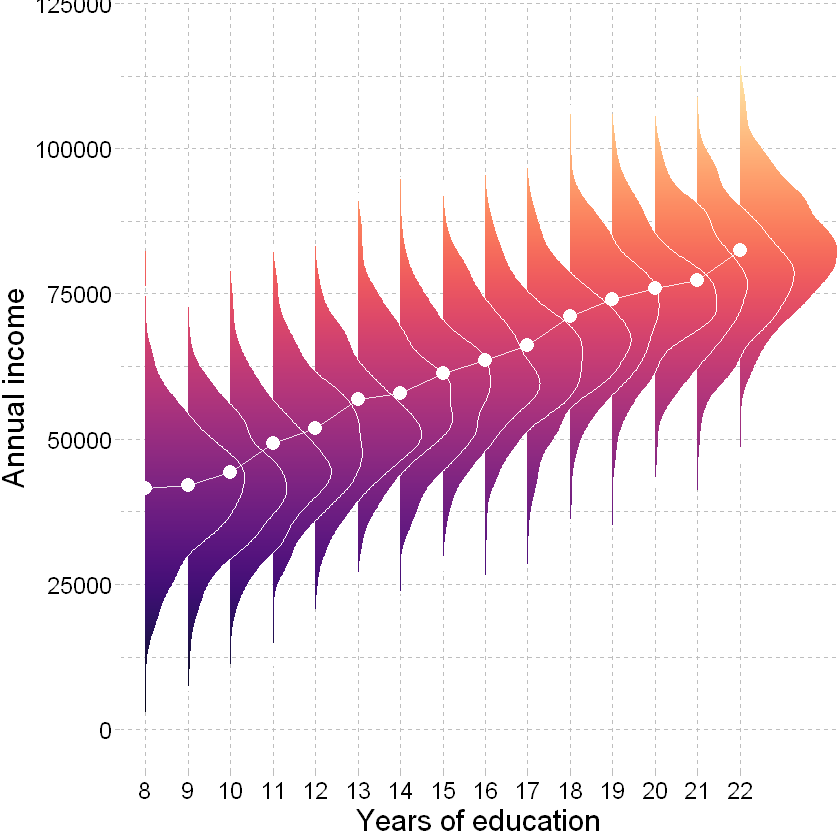

In [17]:
gg_cef +
  geom_path(
    data = means_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "white",
    alpha = 0.85
  ) +
  geom_point(
    data = means_df,
    aes(x = y, y = x %>% as.factor()),
    color = "white",
    shape = 16,
    size = 3.5
  )

__The CEF, $\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]$, connects these conditional distributions' means.__

Picking joint bandwidth of 2410

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.g

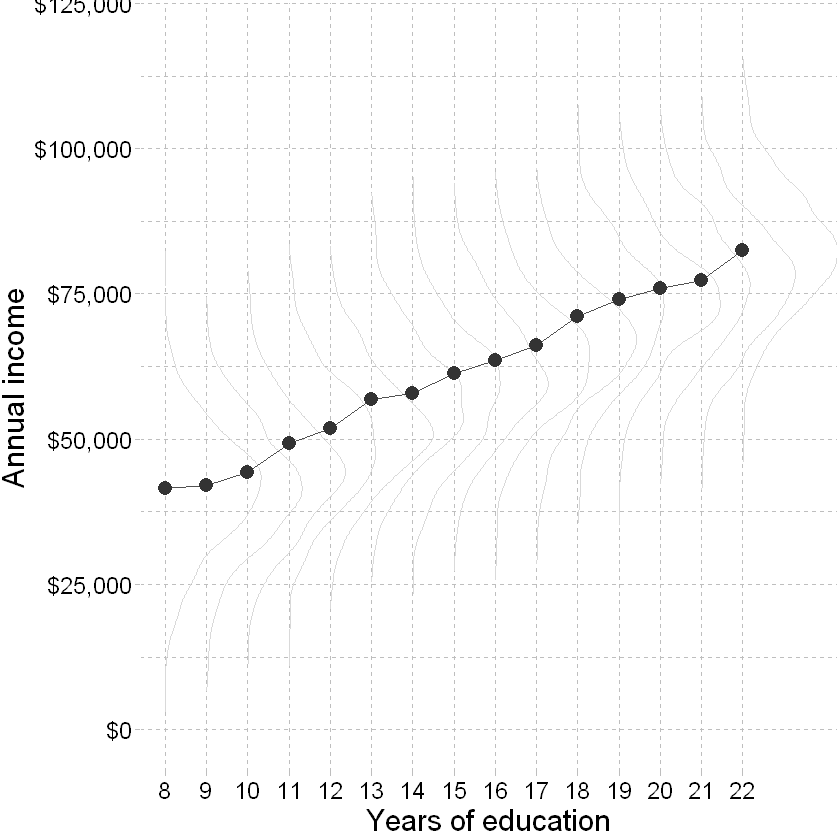

In [18]:
ggplot(data = cef_df, aes(x = y, y = x %>% as.factor())) +
  geom_density_ridges(
    rel_min_height = 0.003,
    color = "grey85",
    fill = NA,
    scale = 2.5,
    size = 0.3
  ) +
  scale_x_continuous(
    "Annual income",
    labels = scales::dollar
  ) +
  ylab("Years of education") +
  scale_fill_viridis(option = "magma") +
  theme_pander(base_family = "Fira Sans Book", base_size = 18) +
  theme(
    legend.position = "none"
  ) +
  geom_path(
    data = means_df,
    aes(x = y, y = x %>% as.factor(), group = 1),
    color = "grey20",
    alpha = 0.85
  ) +
  geom_point(
    data = means_df,
    aes(x = y, y = x %>% as.factor()),
    color = "grey20",
    shape = 16,
    size = 3.5
  ) +
  coord_flip()

### The *CEF* and regression


As we derive the properties and relationships associated with the CEF, regression, and a host of other estimators, we will frequently rely upon<br>.*the Law of Iterated Expectations* (LIE).
$$
\begin{align}
  \color{#6A5ACD}{\mathop{E}\left[ \text{Y}_{i} \right]} = \mathop{E}\!\bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} \bigg)
\end{align}
$$
which says that the __unconditional expectation__ is equal to the __unconditional average__ of the __conditional expectation function__.

__A proof of the LIE__

First, we need notation...

Let $\mathop{f_{x,y}}(u,t)$ denote the joint density for continuous RVs $\left( \text{X}_{i},\text{Y}_{i} \right)$.

Let $\mathop{f_{y|x}}(t\mid \text{X}_{i}=u)$ denote the conditional distribution of $\text{Y}_{i}$ given $\text{X}_{i}=u$.

And let $\mathop{g_y}(t)$ and $\mathop{g_x}(u)$ denote the marginal densities of $\text{Y}_{i}$ and $\text{X}_{i}$.

$\mathop{E}\!\bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} \bigg)$
<br>  $= {\displaystyle\int} \color{#e64173}{\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} = u \right]} \mathop{g_x}(u) du$
<br>  $={\displaystyle\int} \color{#e64173}{\left[{\displaystyle\int} t \mathop{f_{y|x}}\left( t\mid \text{X}_{i}=u \right) dt\right]} \mathop{g_x}(u) du$
<br>  $={\displaystyle\int} {\displaystyle\int} \color{#e64173}{t \mathop{f_{y|x}}\left( t\mid \text{X}_{i}=u \right)} \mathop{g_x}(u) du \, \color{#e64173}{dt}$
<br>  $={\displaystyle\int} \color{#e64173}{t} \left[ {\displaystyle\int} \color{#e64173}{\mathop{f_{y|x}}\left( t\mid \text{X}_{i}=u \right)} \mathop{g_x}(u) du \right] \color{#e64173}{dt}$
<br>  $={\displaystyle\int} \color{#e64173}{t} \left[ {\displaystyle\int} \mathop{f_{x,y}}(u,t) du \right] \color{#e64173}{dt}$
<br>  $={\displaystyle\int} \color{#e64173}{t} \mathop{g_y(t)} \color{#e64173}{dt}$
<br>  $=\mathop{E}\left[ \text{Y}_{i} \right]$

__What's the point?__

_The CEF decomposition property (3.1.1)_

The LIE allows us to **decompose random variables** into two pieces


$$
\begin{align}
  \text{Y}_{i} = \color{#e64173}{\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} + \color{#6A5ACD}{\varepsilon_i}
\end{align}
$$

1. _the conditional expectation function_
2. _a residual_ with special powers
<br> i.  $\color{#6A5ACD}{\varepsilon_i}$ is mean independent of $\text{X}_{i}$, _i.e._, $\mathop{E}\left[ \color{#6A5ACD}{\varepsilon_i} \mid \text{X}_{i} \right] = 0$.
<br> ii.  $\color{#6A5ACD}{\varepsilon_i}$ is uncorrelated with any function of $\text{X}_{i}$.

__Proof__ The CEF decomposition property (properties i. and ii. of $\color{#6A5ACD}{\varepsilon_i}$)


_Mean independence_, $\mathop{E}\left[ \color{#6A5ACD}{\varepsilon_i} \mid \text{X}_{i} \right] = 0$
$$
\begin{align}
  &\mathop{E}\left[ \color{#6A5ACD}{\varepsilon_i} \mid \text{X}_{i} \right] \\[0.6em]
  &= \mathop{E}\!\bigg( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i}\mid \text{X}_{i} \right]} \bigg| \text{X}_{i} \bigg) \\[0.6em]
  &= \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \mathop{E}\!\bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \bigg| \text{X}_{i} \bigg) \\[0.6em]
  &= \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \\[0.6em]
  &= 0
\end{align}
$$

_Zero correlation_ btn. $\color{#6A5ACD}{\varepsilon_i}$ and $\mathop{h}\left( \text{X}_{i} \right)$
$$
\begin{align}
  &\mathop{E}\left[ \mathop{h}\left( \text{X}_{i} \right) \color{#6A5ACD}{\varepsilon_i}\right] \\[0.6em]
  &= \mathop{E}\!\bigg( \mathop{E}\left[ \mathop{h}\left( \text{X}_{i} \right) \color{#6A5ACD}{\varepsilon_i}\mid \text{X}_{i} \right]\bigg) \\[0.6em]
  &= \mathop{E}\!\bigg( \mathop{h}\left( \text{X}_{i} \right) \mathop{E}\left[\color{#6A5ACD}{\varepsilon_i}\mid \text{X}_{i} \right]\bigg) \\[0.6em]
  &= \mathop{E}\left[ \mathop{h}\left( \text{X}_{i} \right) \times 0\right] \\[0.6em]
  &= 0
\end{align}
$$

__The CEF decomposition property__ says that we can decompose any random variable (_e.g._, $\text{Y}_{i}$) into

1. a part that is __explained by__ $\color{#e64173}{\text{X}_{i}}$ (_i.e._, the CEF $\color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]}$),
2. a part that is *orthogonal to* any function of] $\color{#6A5ACD}{\text{X}_{i}}$ (_i.e._, $\color{#6A5ACD}{\varepsilon_i}$).

__Why the CEF?__
_CEF_ also presents an intuitive summary of the relationship between $\text{Y}_{i}$ and $\text{X}_{i}$, since we are often use means to characterize random variables.


But (of course) there are more reasons to use the CEF...

__prediction__

_Theorem_ The CEF prediction property (3.1.2)

Let $\mathop{m}\left( \text{X}_{i} \right)$ be *any* function of $\text{X}_{i}$. The CEF solves
$$
\begin{align}
  \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} = \underset{\mathop{m}\left( \text{X}_{i} \right)}{\text{arg min}}\enspace \mathop{E}\left[ \left( \text{Y}_{i} - \mathop{m}\left( \text{X}_{i} \right) \right)^2 \right]
\end{align}
$$
In other words, the _CEF_ is the minimum mean-squared error (MMSE) predictor of $\text{Y}_{i}$ given $\text{X}_{i}$.

*Notice*
1. We haven't restricted $m$ to any class of functions—it can be nonlinear.
2. We're talking about *prediction* (specifically predicting $\text{Y}_{i}$).

__Proof__ The CEF prediction property

$\bigg( \text{Y}_{i} - \mathop{m}\left( \text{X}_{i} \right) \bigg)^2$ (**1**)
<br>  $= \bigg( \big\{ \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \big\} + \big\{ \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \mathop{m}\left( \text{X}_{i} \right) \big\} \bigg)^2$
<br>  $= \bigg( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \bigg)^2$  (**a**)
<br>   $+ 2 \bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right] - \mathop{m}\left( \text{X}_{i} \right)}\bigg)\times \bigg( \text{Y}_{i} - \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \bigg)$  **b**)
<br>   $+ \bigg( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} - \mathop{m}\left( \text{X}_{i} \right) \bigg)^2$  (**c**)

 We want to choose the $\mathop{m}\left( \text{X}_{i} \right)$ that minimizes (**1**) in expectation.
<br> (**a**) is irrelevant, _i.e._,  it does not depend upon $\mathop{m}\left( \text{X}_{i} \right)$.
<br> (**b**) equals zero in expectation: $\mathop{E}\left[ \mathop{h}\left( \text{X}_{i} \right)\times \color{#6A5ACD}{\varepsilon_i} \right] = 0$.
<br> (**c**) is minimized by $\mathop{m}\left( \text{X}_{i} \right) = \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]}$, _i.e._, when $\mathop{m}\left( \text{X}_{i} \right)$ is the .pink[CEF].


∴ the CEF is the function that minimizes the mean-squared error (MSE)
$$
\begin{align}
  \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} = \underset{\mathop{m}\left( \text{X}_{i} \right)}{\text{arg min}}\enspace \mathop{E}\left[ \left( \text{Y}_{i} - \mathop{m}\left( \text{X}_{i} \right) \right)^2 \right]
\end{align}
$$

One final property of the _CEF_ (very similar to the decomposition property)

**Theorem** The ANOVA theorem (3.1.3)
$$
\begin{align}
  \mathop{\text{Var}} \left( \text{Y}_{i} \right) = \mathop{\text{Var}} \left( \color{#e64173}{\mathop{E}\left[ \text{Y}_{i} \mid \text{X}_{i} \right]} \right) + \mathop{E}\left[ \mathop{\text{Var}} \left( \text{Y}_{i} \mid \text{X}_{i} \right) \right]
\end{align}
$$
which says that we can decompose the variance in $\text{Y}_{i}$ into
1. the variance in the **CEF**
2. the variance of the residual


*Example* Decomposing wage variation into (1) variation explained by workers' characteristics and (2) unexplained (residual) variation

## Hypothesis Tests and associated concepts*

Once estimation is over we can use it make inference about the population parameter (or can test the hypothesis about the population parameter).The following section defines some of the related concepts

### A statistical hypothesis

A statistical hypothesis  is a statement about the values of some population
parameters of interest.

#### Null Hypothesis: 

The hypothesis we are testing is often called as null hypothesis denoted by $H_{0}.$ The $H_{0}$ specifies some aspect of the distribution of variables under consideration. The null hypothesis of \ $\beta_2 =0$ in a bivariate
regression model implies that there is no relation between $x$ and $y$

#### Test Statistics and its distribution

To test the consistency of the $H_{0}$ with the data we require a test statistics say $TS.$ The test statistics is often computed using the estimators. Hence the distribution of $TS$ depends on the distribution of estimators. Similarly the distribution of test statistics is considered by placing restrictions implied by the null hypothesis. Given the sample
observations we can  then calculate the value of test statistics ,let us denote this realization of $TS$  as $ts$. Then the consistency of data with the hypothesis can be tested by looking into the probability of getting that
particular sample statistics from the distribution of test statitcs $TS$ under the null.

In summary the TS can be considered as a test statistics for $H_{0}$ if
- the distribution of TS under null is known and
- larger the absolute value of $ts$ the greater the evidence of departure from $H_{0}$ with repect to a two sided hypotheis testing

Note: Given the particular $ts$ \ from a sample, the departure from $H_{0}$ can be specified  two ways: one sided and two sided. If we are considering the departure from H$_{0}$ in terms of $abs(ts)$ then it is a two sided test.

In general, the departure from $H_{0}$ can be defined in terms of the marginal level of significance (msl) or**p-values** as follows:

One sided positive msl: msl$^{+}=p(TS\geq ts|H_{0})$

(It can be read as follows: One sided positive msl  is the probability under $H_{0}$ that the random variable $TS$ is greater than or equal to the realization of the test statistic.)

One sided negative msl: msl$^{^{\_}}=p(TS\leq ts|H_{0})$

Two sided msl: msl $=p(abs(TS)\geq abs(ts)|H_{0})$

#### Test Statistics for LS estimators under normality with known $\sigma ^{2}$

We have already discussed the sampling distribution of LS estimators in section4
For illustrative purpose consider the slope coefficient.

$\hat{\beta_2}\sim N(\beta_2,var(\hat{\beta}_2))$ 

Given the above information we can compute a test statistics as follows

$Z_\hat{\beta_2}=\frac{\hat{\beta_2}-\beta_2 }{S.E(\hat{\beta}_2)}\sim N(0,1)$ 
where $Z\hat{\beta}_2$ is the test statistics and $S.E(\beta)$ is the standard error of $\hat{\beta}_2$ with is equal to $\sqrt{\sigma^{2}/\sum(x_i-\bar{x})^2}$.
Thus if the $\varepsilon_{i}$ are normally distributed then the distribution of teststatistics for $\hat{\beta_2}$ will be a standard normal given the known $\sigma ^{2}$

Given $H_{0}:\beta_2 =0$ we get

$Z_{\hat{\beta_2 }}=\frac{\hat{\beta_2}}{\sqrt{\sigma ^{2}/S_{xx}}}\sim
N(0,1)$

Assume the $ts$ from a particular sample is $1.96$ then the two sided a p values can be calculated as follows:



Two sided p-value(msl)

$p-value =p(abs(TS)\geq abs(1.96)|H_{0})=0.05$

When only distributions under $H_{0}$ specified, the test for departures from $H_{0}$ is known as pure significance tests. But often we will have to specify an alternative to the Null.

#### Alternative Hypothesis


For \Simple linear function the null and alternative hypothesis for the $%
\beta $ \ may be specified as follows.

$Y=\alpha +\beta X+u$

$H_{0}:\beta =0$

$H_{1}:\beta \neq 0$ (two sided i.e. $H_{1}:\beta >0$ or $H_{1}:\beta
<0$

#### Testing procedure

Testing the compatibility of empirical model with $H_{0}, $involves
specifying \ a reference value which gives the an acceptable margin of error
while rejecting the true null hypothesis. The reference value is set after
allowing for a small error(say 5\% or 1\%) while taking decision to reject
the null. The reference value  is known as critical values. The critical
values are chosen to divide the distribution of TS under $H_{0}$ into
rejection region and nonrejection area. The critical values are associated
with a marginal significance level and it is known as significance level of
the test and is usually denoted as $\alpha $ (Typical significance level
values are 0.01, 0.0 and \ 0.10).  If the computed sample test statistics falls in the
rejection area then we reject the Null otherwise we fail to reject the null

Example:

If $\hat{\beta}$ is normally distributed then we have a test statistics
that is standard normal as follows

$TS\sim N(0,1)|H_{0}$

Given the level of significance ($\alpha=0.10)$ we can get the
critical values from any std normal tables as $\pm 1.65(Two$ $sided).$ 

In this case the rejection region are $-\infty $ to $-1.65$ and 1.65 to $
\infty.$

Alternatively we take the decision based on the msl of computed test
statistics.

Suppose $TS\sim N(0,1)|H_{0}$ and $ts=1.8$ then

Two sided p-value (msl) \ for 1.8 is:

$p(abs(TS)\geq abs(1.8)|H_{0}))=2(0.0359)=0.718$


Thus the sample realization of test statistics helps to take a view about
the consistency of  an hypothesis  with the data. \First we need to set
up an $H_{0}$ about a coefficient or coefficients against an alternative
that is not restricted atleast in one direction. Then the realized value of
test statistics will provide evidence from one sample with small $p-values$
indicating lack of consistency with the null hypothesis.

#### Power of the test

Power of the test is nothing but the rejection of $H_{0\text{ }}$when it is
not true.  Test procedure discussed above tried to maximize the power after
choosing the size of the test. Thus while testing we may make two types of
errors known as Type 1 error and type 2 error.( See the table below)

| | Do not reject $H_{0}$   |Reject $H_{0}$ |
| ---      | ---       |---|
|$H_{0}$ is true|Correct decision, <br> Confidence level($1-\alpha$)|Type 1 error <br>( size or significance level=$\alpha $)|
|$H_{0}$ is not true | Type 2 error($\phi$ )| Correct decision <br> Power=1-$\phi $|


There is always a trade off between these two type of errors. Type 1 error has implications for confidence level and Type 2 has implication to the
power of the test. It is not possible to minimize without implication for
other. As type one error  increases the power of the test also increases.
Never rejecting a null hypothesis has zero Type 1 error but have no power.
Similarly power of a test increases with its departure from $H_{0}.$ When
there is no departures from $H_{0}$ power and size of the test are equal.

#### Test Statistics for LS estimators under normality (with unknown }$\sigma ^{2})$}

Earlier we have specified

$z_{\beta_2 }=\frac{\hat{\beta_2}-\beta_2 }{S.E(\beta_2)}\sim N(0,1)$

where $S.E(\beta)=\sqrt{\sigma^{2}/\sum(x_i-\bar{x})^2}$.  Howevr  the error variance $\sigma^{2}$ is unknown to us and has to be estimated which is given as below:

i.e. $s^{2}=\frac{\sum {e}_{i}^{2}}{n-2}$

Substituting $s^2$ for s $\sigma^{2}$ gives the following distribution for test statistics

 $\frac{\hat{\beta_2}-\beta_2}{S.E.(\hat{\beta}_2)}\sim t_{n-2}$

Similar result can be derived for $\beta_1$ as well. 

These results can be easily extented to multiple regression case.
#### confidence intervals
Assuming that the sampling distribution approches normal distribution as the number of observations incerases we have:
- $\beta \pm s.e.(\beta)$ is the 68 % confidence intervel around the unkown population parameter
- $\beta \pm 1.96 s.e(\beta)$ is the 95% confidence intervel around the unkown population parameter

#### F statistics: Joint significance
- 'F statistic' used  to test the hypothesis that all the  $\beta_i$, i=2,..,K  are jointly equal to zero except the intercept 
$$F =\frac{(SSR_{res}-SSR)/(K-1)}{SSR/(N-K)}$$ where $SSR_{res}$ is the sum of squared residuals from a restricted regression that contains only an intercept. Here
$$H_0:\beta_2=\beta_3=...=\beta_k=0$$


## Example:  Wage equation: Coefficients and hypothesis testing
 
 How does education and experience affect wages?
 See pp 42-55 for a detailed discussion



In [5]:
reg1 <- lm(LNWAGE~EDUC + EXPER,data=wage95)
summary(reg1)


Call:
lm(formula = LNWAGE ~ EDUC + EXPER, data = wage95)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96035 -0.32125  0.00331  0.33805  1.64061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.867382   0.075331   11.51   <2e-16 ***
EDUC        0.093229   0.005045   18.48   <2e-16 ***
EXPER       0.013104   0.001164   11.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4923 on 1320 degrees of freedom
Multiple R-squared:  0.2322,	Adjusted R-squared:  0.2311 
F-statistic: 199.6 on 2 and 1320 DF,  p-value: < 2.2e-16


The results above gives the estimates of coeffficients, standard errors, t statistics and the associated P values.
F statistics to test the joint significance are also given.

## Some useful results
- Optimized value of the LS objective

$$SSR=\sum_{i=1}^N e_i^2=\sum_{i=1}^N (y_i-\hat{y}_i)^2$$

Sum of squred Explained(regression)
$$SSE=\sum_{i=1}^N (\hat{y}_i-\bar{y})^2$$
Sum of squred Total
$$SST=\sum_{i=1}^N ({y}_i-\bar{y})^2$$

In [4]:
deviance(reg1)

[1] 319.9376

#### Std error of the regression
 - variance of of the prediction error $\varepsilon = \sigma^2$
 - Let $s^2$be anestimate of $\sigma^2$ and is given by $$s^2=\frac{\sum_{i=1}^N e_i^2}{N-K}$$
 - Std error of regression is $$\sqrt{s^2}$$

### Goodness of fit
- $R^2$ is a measure of in sample predictability(goodness of fit) 
- it is the percent of the variance of y explained by the variables included in the regression
<div>
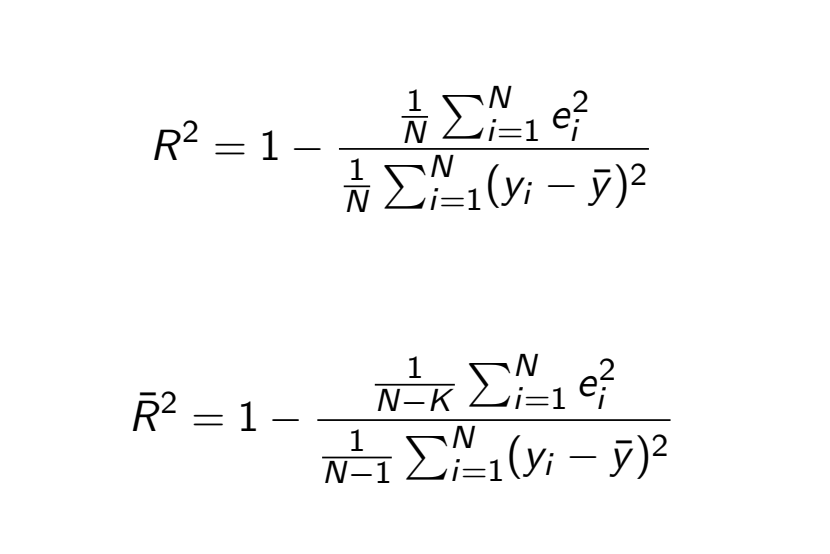
</div>

- $R^2$ and $\bar{R}^2$ effectively compare the in-sample accuracy of conditional-mean and unconditional-mean forecasts.
- Both measures have  has MSE as numerator
- $R^2 =0.232$ and  Adjusted $R^2= 0.231$
Alternately we have 
$$RSS=\frac{SSE}{SST}=1-\frac{SSR}{SST}$$( see the definitions above)



## y vs $\hat{y}$
- A perfect fit $(R^2 = 1)$ corresponds to all points on the 45 degree line and no fit $(R^2 = 0)$ corresponds to all points on a vertical line corresponding to $y = \bar{y}$

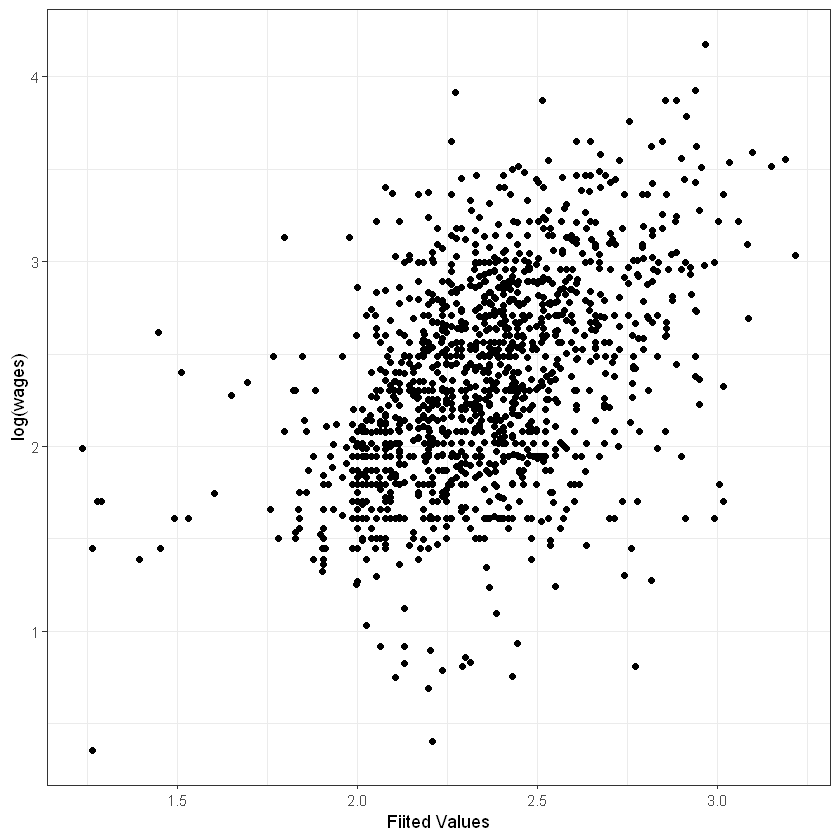

In [24]:
fit1 <- fitted.values(reg1)# fitted values


ggplot()+ geom_point(aes(y=lnwages,x=fit1))+xlab("Fiited Values") +
  ylab("log(wages)") +theme_bw()



In [ ]:
## Residual plot

integer(0)

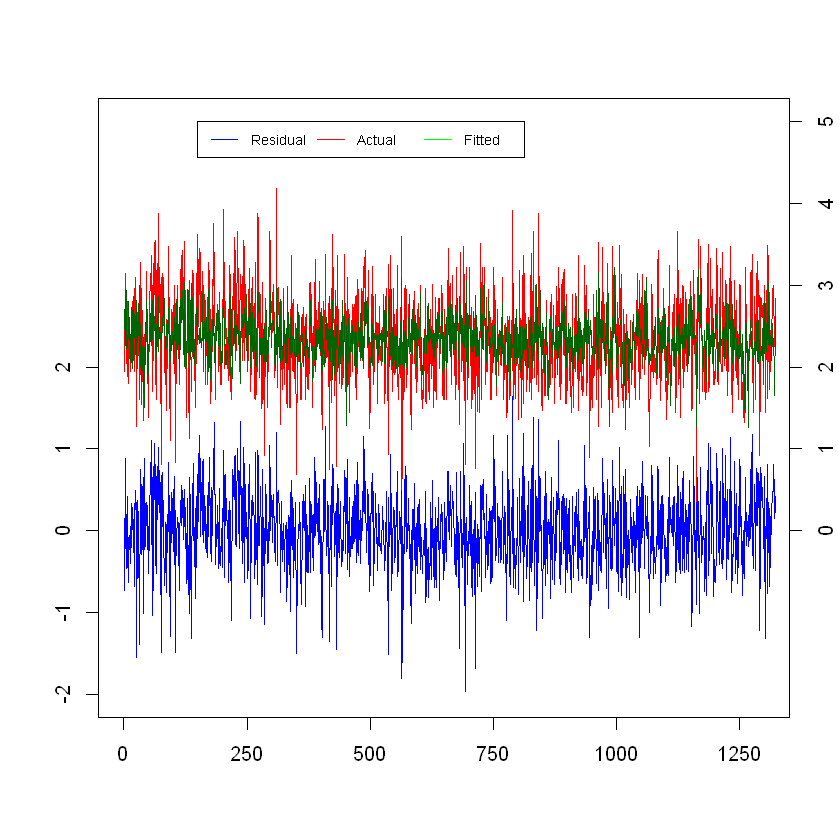

In [49]:
resi_reg1 <- resid(reg1)#residuals


plot(lnwages, type="l", axes=FALSE, xlim=c(0,1300), ylim=c(-2,5), xlab="", ylab="", col="red") +
  lines(fit1, col="darkgreen") +
  lines(resi_reg1, col="blue")
box()
axis(side=1, at=c(0,250,500,750,1000,1250))
axis(side=2, at=c(-2,-1,0,1,2))
axis(side=4, at=c(0,1,2,3,4,5))
par(xpd=TRUE)
legend(150, 5,inset=c(-0.3,0), legend=c("Residual","Actual","Fitted"),lty=c(1,1),col=c("blue","red","green"), cex=0.7, horiz=TRUE)

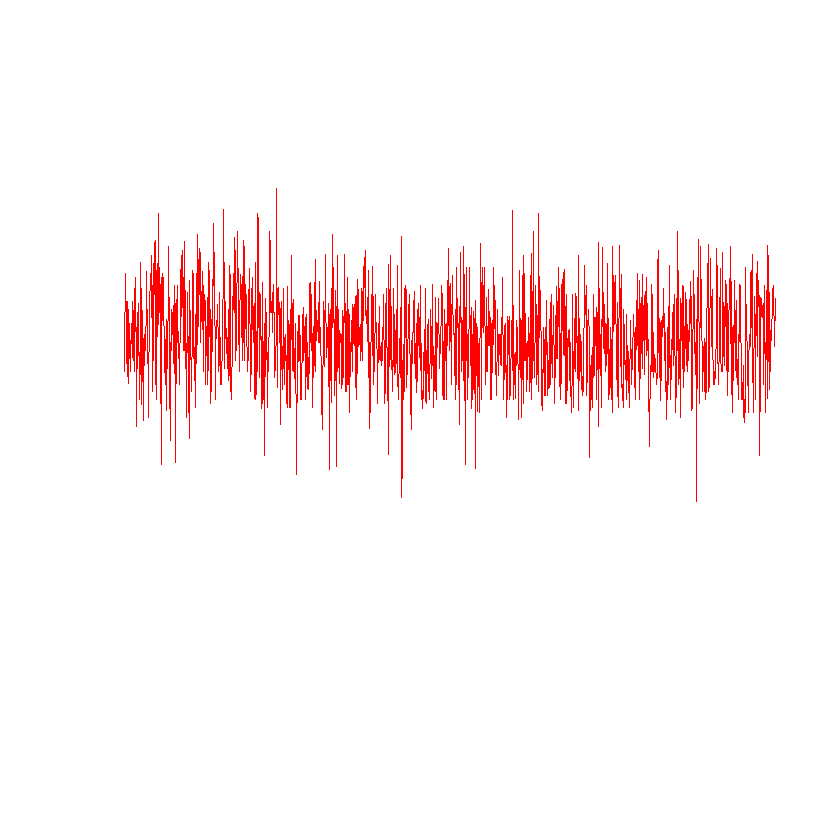

In [26]:
plot(lnwages, type="l", axes=FALSE, xlim=c(0,1300), ylim=c(-2,5), xlab="", ylab="", col="red")

### An example
eg1.csv data on 654 youths, aged 3to 19, in the areas of East Boston in the late 1970s on the following variables

- fev = continuous measure (in liters)
- smoke = smoker coded as 1, non-smoker coded as 0
- age = in years
- ht = height in inches
- sex = coded 1 for male and 0 for female

fev stands for forced expiratory volume, the volume of air that can be forced out after taking a deep breath, an important measure of pulmonary function. The objective of this exercise is to find out the impact of age, height, weight and smoking habits on fev.

Try to develop a model to check this? what are the expected results?

Would you reject the hypothesis that the (slope) coefficients of all the regressors are statistically insignificant? 

What is the R2 value of your regression model? How would interpret this value?b

Would you expect age and height to be correlated? 

In [6]:
data_eg1 <- read.csv("eg1.csv",sep=",",header=T)


## OLS vs ML estimation
- Under ideal conditions OLS is equivalent to ML
- Maximum-likelihood estimation : find the parameter configuration that maximizes the likelihood of getting the $y_i$’s that you actually did get.
- Linear regression (DGP) under IC implies that:
<div>
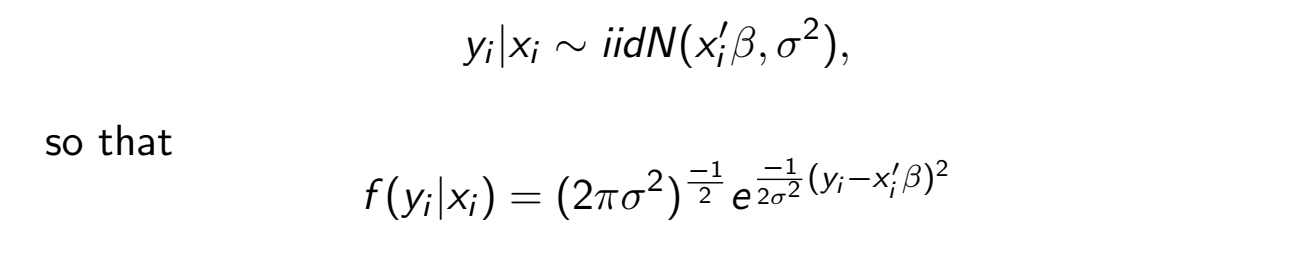
</div>

Now by independence of the $\varepsilon_i$'s and hence $y_i$’s,

<div>
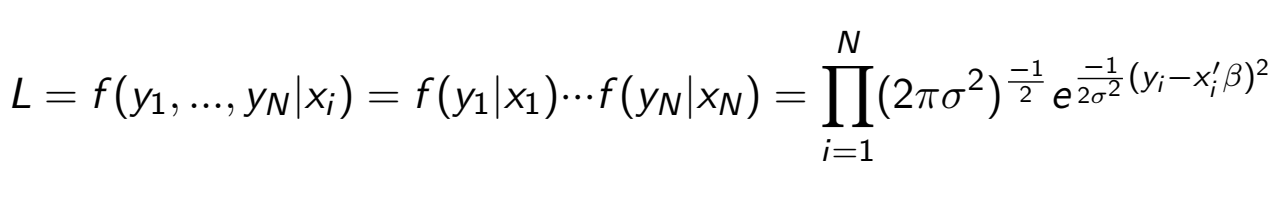
</div>

<div>
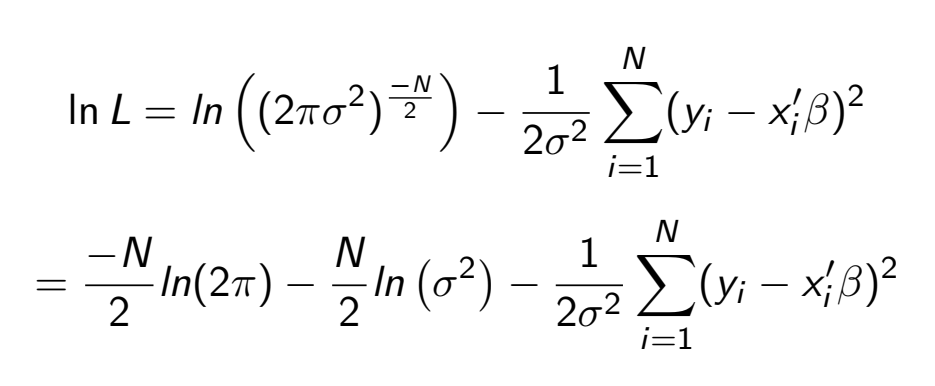
</div>
Codes for ML estimation is given below

In [7]:
# prepare data  matrix for ML estimation

x <- cbind(1,edu,exper)
y <- as.matrix(lnwages)
ones <- x[,1]


In [8]:
# Specify no of parameter

K <- ncol(x)
K

K1 <- K + 1 
n <- nrow(x) # no of obs

[1] 3

In [9]:
 # log Likelihood function to be optimised
 
llik.reg <- function(par,X,Y) {
Y <- as.vector(y)
X <- as.matrix(x)
xbeta <- X%*%par[1:K]
Sig <- par[K1:K1]
  sum(-(1/2)*log(2*pi)-(1/2)*log(Sig^2)-(1/(2*Sig^2))*(y-xbeta)^2)
}



In [10]:
 # Estimation

model <- optim(c(0,0,0,10),llik.reg, method = "BFGS", control = list(trace=1,maxit=100,fnscale = -1),hessian = TRUE)


initial  value 4300.442187 
iter  10 value 2426.290175
iter  20 value 1101.032278
iter  30 value 938.236056
final  value 938.235848 
converged


The coefficients from this model are the same as those produced through OLS estimation.(You may verify) 

In [11]:
# Calculate the variance matrix from the Hessian matrix. 
v <- -solve(model$hessian)


In [12]:
# Calculate the standard errors from the variance matrix.

se <- sqrt( diag(v))


In [13]:
# Calculate the z statistics from the coefficients and standard errors
b <- model$par

In [14]:
zstat <-b/se


In [15]:
# Calculate p-values for the z statistics

pzstat <- 2* (1 - pnorm(abs(zstat)))


In [16]:
# Put the results together in a table.

table <- cbind(b,se,zstat,pzstat)
table

 

b,se,zstat,pzstat
0.86745744,0.075245275,11.52840,0
0.09322559,0.005039149,18.50027,0
0.01310286,0.001162220,11.27399,0
0.49175949,0.009559821,51.44024,0


## Regression on intercept
- Sample mean is just LS regression on nothing but an intercept.
- Intercept picks up a "level effect"
- Regression generalizes the sample mean to include predictors other than just a constant
- If an intercept is included in a regression,the residuals must sum to 0 

##  Predictive aspects
- Conditional mean: 
$E(y_i|x_i=x^\ast)=x'^\ast \beta$
- Conditional variance: 
$var(y_i|x_i=x^\ast)=\sigma^2$
- Full conditional density: 
$y_i|x_i=x^\ast \sim N(x'^\ast \beta,\sigma^2)$
### Point Prediction
If a new person $y_i$ arrives with characteristics $x_i=x^\ast$, what is the best prediction of $y_i$
**The conditional mean is the minimum MSE point predictor**
- LS delivers operational optimal predictor with great generality
- Follows immediately from the LS optimization problem

Non-operational version (remember, in reality we don’t know $\beta$):
$$E(y_i|x_i=x^\ast)=x^\ast\beta$$
Operational version (use β^LS)(regression fitted value at $x_i=x^\ast$):
$$E(y_i|x_i=x^\ast)=x^\ast\hat{\beta}$$
### interval Prediction
non-operational (with probability 0.95)
$$y_i \in [x^\ast\beta \pm 1.96 \sigma] $$
operational(w.p. 0.95)
$$y_i \in [x^\ast\hat{\beta} \pm 1.96 s] $$

### Density Prediction
Density Prediction"
Non-operational version:
$$y_i|x_i=x^\ast \sim N(x^\ast \beta, \sigma^2)$$
Operational version:
$$y_i|x_i=x^\ast \sim N(x^\ast \hat{\beta}, s^2)$$

Similarly,
- The OLS fitted values, $\hat{y}_i = x_i\hat{\beta}$, are effectively in-sample regression predictions.
- OLS coefficient signs and sizes give the weights put on the various x variables in forming the best in-sample prediction of y.
- The standard errors, t statistics, and p-values let us do statistical inference as to which regressors are most relevant for predicting y.
- The OLS residuals, $e_i = y_i − \hat{y}_i$, are effectively in-sample prediction errors corresponding to use of the regression predictions.
- SSR that we discussed earlier measures "total" in-sample predictive accuracy or "squared-error loss" or "quadratic loss"
- SSR is closely related to in-sample MSE:$$MSE=\frac{1}{N}SSR$$
- The F statistic effectively compares the accuracy of the regression-based forecast to that of the unconditional-mean forecast.
- Helps us assess whether the x variables, taken as a set, have predictive value for y.
- Contrasts with the t statistics, which assess predictive value of the x variables one at a time.

### Naive benchmark forecast
- The sample, or historical, mean of the dependent variable, $\bar{y}$, an estimate of the unconditional mean of y, is a naive benchmark forecast. It is obtained by regressing y on an intercept alone { no conditioning on other regressors}.
- The sample standard deviation of y is a measure of the in-sample accuracy of the unconditional mean forecast $\bar{y}$.